# Image data sets

In [10]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import corner
import logging

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

sys.path.append("../../")
from experiments.datasets import FFHQStyleGAN2DLoader


## Options

In [2]:
highres = False
transform = True


## Transform images to numpy arrays (only need to do this once)

In [33]:
def load_pngs(filename, range_):
    imgs = np.array([plt.imread(f"../data/samples/gan2d/{filename}.png".format(i)).astype(np.float) for i in range_])
    imgs = np.transpose(imgs, [0,3,1,2])  # Want (batch, c, h, w)
    return imgs

if transform:
    np.save("../data/samples/gan2d/grid.npy", load_pngs("grid/grid_64_{:04}", range(81)))
    np.save("../data/samples/gan2d/grid_highres.npy", load_pngs("grid/grid_1024_{:04}", range(81)))
    np.save("../data/samples/gan2d/train.npy", load_pngs("train_test/subspace_64_{:05}", range(1, 10001)))
    np.save("../data/samples/gan2d/train_highres.npy", load_pngs("train_test/subspace_1024_{:05}", range(1, 101)))
    np.save("../data/samples/gan2d/test.npy", load_pngs("train_test/subspace_64_{:05}", range(10001, 11001)))


## Plot images corresponding to 2D grid in latent space

In [34]:
boundary = 2.0
resolution = 9
each = np.linspace(-boundary, boundary, resolution)
each_grid = np.meshgrid(*[each for _ in range(2)], indexing="ij")
each_grid = [x.flatten() for x in each_grid]
gan_zs = np.vstack(each_grid).T

In [35]:
gan_images = np.load("../data/samples/gan2d/grid{}.npy".format("_highres" if highres else ""))
gan_images.shape

(81, 3, 64, 64)

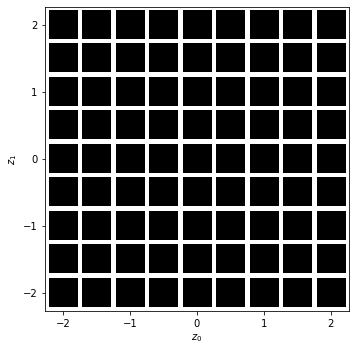

In [36]:
size = 0.42
fig = plt.figure(figsize=(5,5))

for z, image in zip(gan_zs, gan_images):
    image_ = np.transpose(image, [1,2,0]) / 256.
    plt.imshow(image_, extent=(z[0]-size/2, z[0]+size/2, z[1]-size/2, z[1]+size/2))

plt.ylabel("$z_1$")
plt.xlabel("$z_0$")
plt.xlim(-2 - 1.3*size/2, 2 + 1.3*size/2)
plt.ylim(-2 - 1.3*size/2, 2 + 1.3*size/2)

plt.tight_layout()
plt.savefig("../figures/gan2d_grid.pdf", dpi=600)
    

## Training samples

13:55 matplotlib.image               WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
13:55 matplotlib.image               WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
13:55 matplotlib.image               WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
13:55 matplotlib.image               WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
13:55 matplotlib.image               WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
13:55 matplotlib.image               WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
13:55 matplotlib.image               WARNING Clipping input data to th

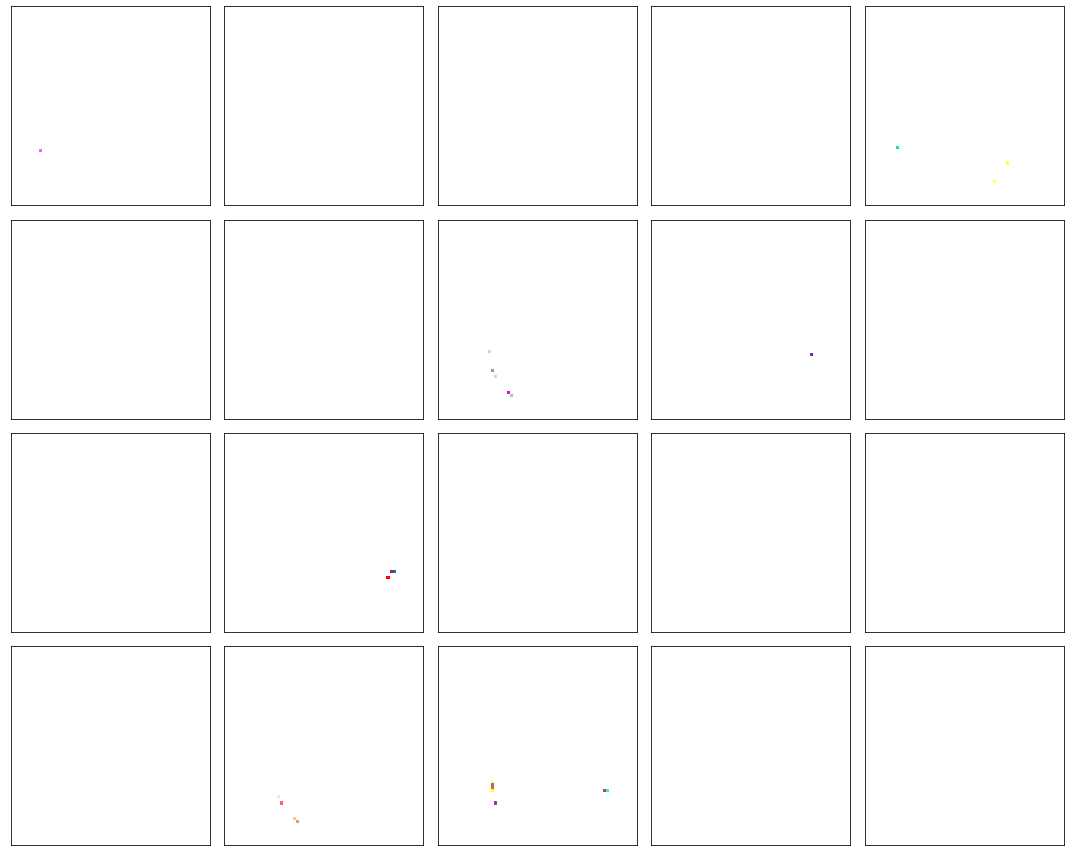

In [38]:
loader = FFHQStyleGAN2DLoader()
data = loader.load_dataset(train=True, dataset_dir="../data/samples/gan2d")
    
fig = plt.figure(figsize=(5*3., 4*3.))

for i in range(20):
    x, _ = data[np.random.randint(len(data) - 1)]
    x_ = np.transpose(np.array(x), [1,2,0])
    ax = plt.subplot(4, 5, i+1)
    plt.imshow(x_)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()
